In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'news-summary:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1895%2F791838%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T095559Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bdca38845aee957fee3ca53618a38fa0e24f7e6907e24e27d0c049f7a54b3f6b28b8770f533724f9472b54399a0a22661d830c466f2f757c24f90a58e7ab9d360b037a42fca5aa539ea199a729225c6b2f420ef2149cff9fb77828ec7581a39ce330641e6b6ef1d4eab1e8694e946d804165d4d9190d019dcc01573b9ed8128613f9b95792c1b2d51ca6a4b61ad9b9a8d257ce37af3b2be5f85fd6885ad4643f3021245d2c4daad56234ec7fa633d86d1768c629abca79351b2c9b4d116fb214ae6c8987dcedf48ea07d57e7c8b55685896305962d686305f30132aca23b2bc13e56516731922ef38ed6b3edfa7ff453560f3e028122e11ae7c85fd8d35df5b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 20718321 bytes downloaded
Downloaded and uncompressed: news-summary
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-summary/news_summary.csv
/kaggle/input/news-summary/news_summary_more.csv


In [ ]:
data=pd.read_csv('/kaggle/input/news-summary/news_summary_more.csv')

In [ ]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [ ]:
data1=pd.read_csv('/kaggle/input/news-summary/news_summary.csv',encoding='latin1')

In [ ]:
data1.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [ ]:
summary=pd.DataFrame()
summary['text']=pd.concat([data1['text'],data['text']],ignore_index=True)
summary['summary']=pd.concat([data1['headlines'],data['headlines']],ignore_index=True)


In [ ]:
summary.head()

,text,summary
0,The Administration of Union Territory Daman an...,Daman & Diu revokes mandatory Rakshabandhan in...
1,Malaika Arora slammed an Instagram user who tr...,Malaika slams user who trolled her for 'divorc...
2,The Indira Gandhi Institute of Medical Science...,'Virgin' now corrected to 'Unmarried' in IGIMS...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Aaj aapne pakad liya: LeT man Dujana before be...
4,Hotels in Maharashtra will train their staff t...,Hotel staff to get training to spot signs of s...


In [ ]:
summary.shape

(102915, 2)

In [ ]:
data.shape

(98401, 2)

In [ ]:
data1.shape

(4514, 6)

In [ ]:
import re
from tqdm import tqdm
#Removes non-alphabetic characters:
def text_strip(column):
    s=[]
    for row in tqdm(column):

        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!

        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower()
        row=re.sub("(\\n)", ' ', str(row)).lower()

        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively

        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!

        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM


        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)

        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass



        row = re.sub("(\s+)",' ',str(row)).lower()


        row=re.sub("(\s+.\s+)", ' ', str(row)).lower()



        s.append(row)
    return s

In [ ]:
text=text_strip(summary['text'].values)
summary=text_strip(summary['summary'].values)

100%|██████████| 102915/102915 [00:05<00:00, 20058.59it/s]


In [ ]:
text=text[:2000]
summary=summary[:2000]

In [ ]:
for i in range(len(summary)):
    summary[i]='<start> '+summary[i]+' <end>'

In [ ]:
train_t=text[:int(len(text)*0.8)]
test_t=text[int(len(text)*0.8):]
train_s=summary[:int(len(text)*0.8)]
test_s=summary[int(len(text)*0.8):]

In [ ]:
summary_max_len=0
for i in summary:
    if summary_max_len<len(i):
        summary_max_len=len(i)
print(summary_max_len)

75


In [ ]:
text_lengths=[]
summary_lengths=[]
for i in tqdm(range(len(text))):
    text_lengths.append(len(text[i]))
    summary_lengths.append(len(summary[i]))


100%|██████████| 2000/2000 [00:00<00:00, 651643.60it/s]


<ipython-input-19-c45ec0d7a0fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_lengths)


<Axes: ylabel='Density'>

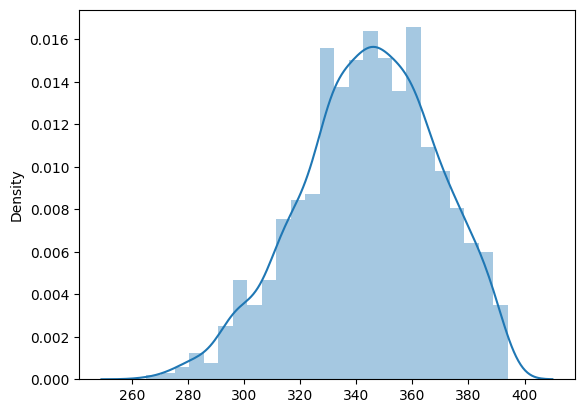

In [ ]:
import seaborn as sns
sns.distplot(text_lengths)

<ipython-input-21-ac846e3b5e0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(summary_lengths)


<Axes: ylabel='Density'>

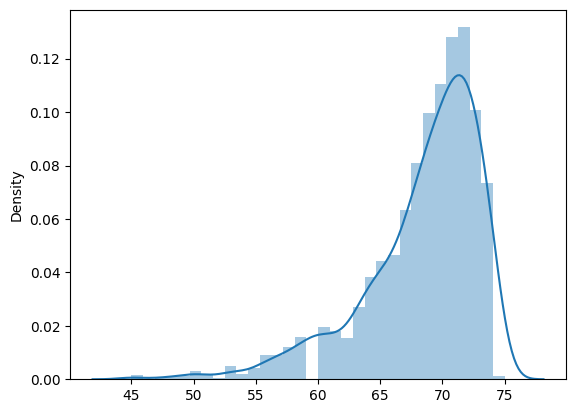

In [ ]:
sns.distplot(summary_lengths)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>", filters='')
tokenizer1 = Tokenizer(oov_token="<OOV>", filters='')
tokenizer.fit_on_texts(train_t)
tokenizer1.fit_on_texts(train_s)
word_index = tokenizer.word_index
print(len(word_index))

13265


In [ ]:
word_index1 = tokenizer1.word_index
print(len(word_index1))

5047


In [ ]:
text_sequences_tr = tokenizer.texts_to_sequences(train_t)
text_padded_tr = pad_sequences(text_sequences_tr,maxlen=150,padding = 'post')

print(text_padded_tr.shape)

(1600, 150)


In [ ]:
summary_sequences_tr = tokenizer1.texts_to_sequences(train_s)
summary_padded_tr = pad_sequences(summary_sequences_tr,maxlen=10,padding = 'post')

print(summary_padded_tr.shape)

(1600, 10)


In [ ]:
text_sequences_te = tokenizer1.texts_to_sequences(test_t)
text_padded_te = pad_sequences(text_sequences_te,maxlen=150,padding = 'post')

print(text_padded_te.shape)

(400, 150)


In [ ]:
summary_sequences_te = tokenizer.texts_to_sequences(test_s)
summary_padded_te = pad_sequences(summary_sequences_te,maxlen=10,padding = 'post')

print(summary_padded_te.shape)

(400, 10)


In [ ]:
x_train=text_padded_tr
y_train=summary_padded_tr
x_test=text_padded_te
y_test=summary_padded_te

In [ ]:
x_train.shape

(1600, 150)

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,GRU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
BUFFER_SIZE = len(x_train)
BATCH_SIZE = 32
steps_per_epoch = len(x_train)//BATCH_SIZE
embedding_dim = 64
units = 128
vocab_inp_size = len(tokenizer.word_index)+1
vocab_tar_size = len(tokenizer1.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([32, 150]), TensorShape([32, 10]))

In [ ]:
import tensorflow as tf
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (32, 150, 128)
Encoder Hidden state shape: (batch size, units) (32, 128)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):

        query_with_time_axis = tf.expand_dims(query, 1)

        score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights


In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (32, 128)
Attention weights shape: (batch_size, sequence_length, 1) (32, 150, 1)


In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):

        context_vector, attention_weights = self.attention(hidden, enc_output)


        x = self.embedding(x)


        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)


        output, state = self.gru(x)


        output = tf.reshape(output, (-1, output.shape[2]))


        x = self.fc(output)

        return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (32, 5048)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0
    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden

        dec_input = tf.expand_dims([tokenizer1.word_index['<start>']] * BATCH_SIZE, 1)
        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(targ[:, t], predictions)
            dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [ ]:
EPOCHS = 10
import time
for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss


    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Loss 6.9220
Time taken for 1 epoch 36.469388008117676 sec

Epoch 2 Loss 6.2793
Time taken for 1 epoch 16.51169180870056 sec

Epoch 3 Loss 6.1566
Time taken for 1 epoch 17.53815507888794 sec

Epoch 4 Loss 6.0646
Time taken for 1 epoch 16.173962116241455 sec

Epoch 5 Loss 5.9992
Time taken for 1 epoch 15.91788363456726 sec

Epoch 6 Loss 5.9516
Time taken for 1 epoch 15.843043565750122 sec

Epoch 7 Loss 5.9155
Time taken for 1 epoch 15.684643030166626 sec

Epoch 8 Loss 5.8798
Time taken for 1 epoch 17.11194109916687 sec

Epoch 9 Loss 5.8501
Time taken for 1 epoch 16.105573892593384 sec

Epoch 10 Loss 5.8147
Time taken for 1 epoch 15.872240781784058 sec



In [ ]:
def evaluate(sentence):
    #attention_plot = np.zeros((max_length_targ, max_length_inp))

    #sentence = preprocess_sentence(sentence)

    inputs = [tokenizer.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=150,
                                                         padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([tokenizer1.word_index['<start>']], 0)

    for t in range(10):
        predictions, dec_hidden , attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)


        #attention_weights = tf.reshape(attention_weights, (-1, ))
        #attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += tokenizer1.index_word[predicted_id] + ' '

        if tokenizer1.index_word[predicted_id] == '<end>':
            return result, sentence
        #, attention_plot


        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence
#, attention_plot

In [ ]:
def translate(sentence):
    result, sentence= evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
translate(text[0])

Input: the administration of union territory daman and diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of rakshabandhan on august the administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.
Predicted translation: to delhi <end> 


In [ ]:
text[0]

'the administration of union territory daman and diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of rakshabandhan on august the administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.'

In [ ]:
summary[0]

'<start> daman diu revokes mandatory rakshabandhan in offices order <end>'